In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

Load the Data and introducing cpy (Claims per Year) as combined response variable. 

In [4]:
train_data = pd.read_csv('data/claims_train.csv')

train_data['cpy'] = train_data['ClaimNb'] / train_data['Exposure']

Looking at the Boxplot of 'Claims per Year' we can see that there are multiple but in particular one very extreme outlier. This is due to short exposure periods in which each single claim results in an enourmous number of claims per year. 

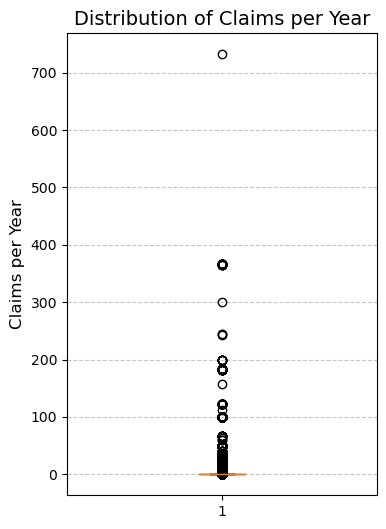

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,cpy
9078,5896.0,2,0.002732,A,11,0,36,50,B12,Diesel,35,R54,732.0
19404,7039.0,1,0.002732,D,4,0,60,50,B12,Regular,1408,R52,366.0
19437,7235.0,1,0.002732,E,5,0,61,50,B12,Regular,7752,R11,366.0
23817,1921.0,1,0.002732,A,4,0,63,50,B12,Regular,41,R91,366.0
27899,8480.0,1,0.002732,C,4,0,48,50,B12,Regular,269,R91,366.0


In [35]:
plt.figure(figsize=(4, 6))
plt.boxplot(train_data['cpy'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.ylabel('Claims per Year', fontsize=12)
plt.title('Distribution of Claims per Year', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

train_data.nlargest(5, 'cpy') 

Pairplot of the numerical predictor variables:

> Vehicle Power Data is put in distinct buckets
> Vehicle Age, Bonus Malus and Density are heavily right skewed with a few heavy outliers



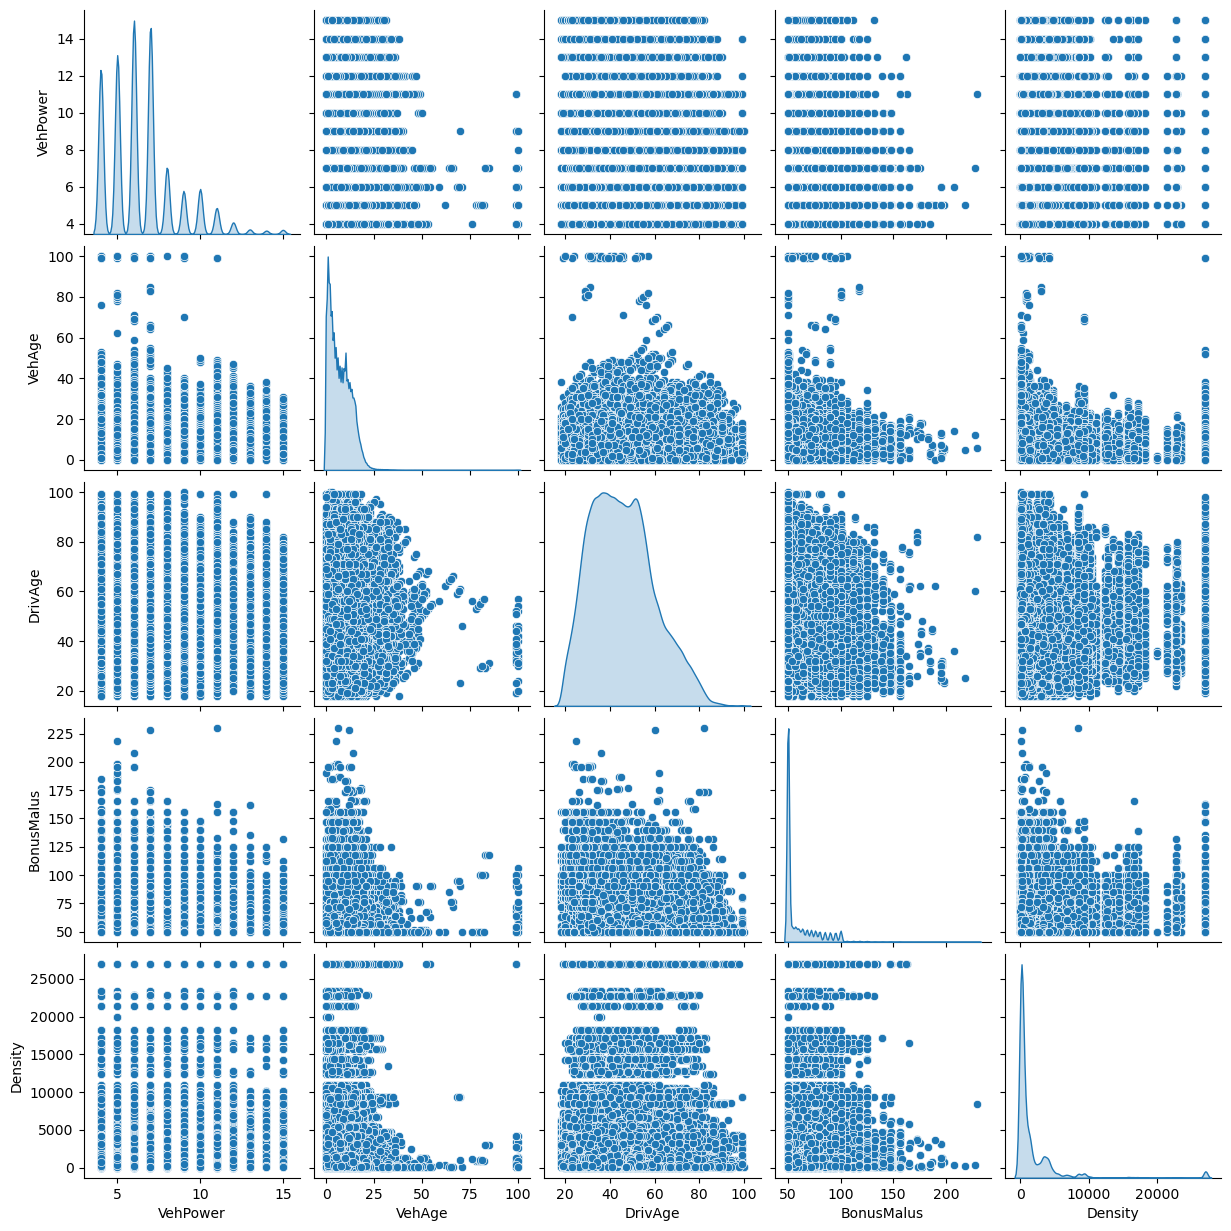

In [36]:
pairplot(train_data[
    ['Area', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 
     'VehBrand', 'VehGas', 'Density', 'Region']
], diag_kind='kde')

Correlation heatmap of the numerical features:

Mostly the numerical features are uncorrelated, except for a large negative correlation between drivers age and Bonus Malus. This makes sense since longer driving experience (with little incidences) would usually give you a higher Bonus Malus. 

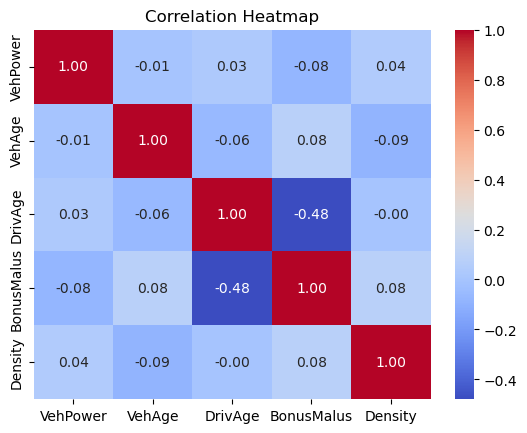

In [9]:
corr = train_data[['VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

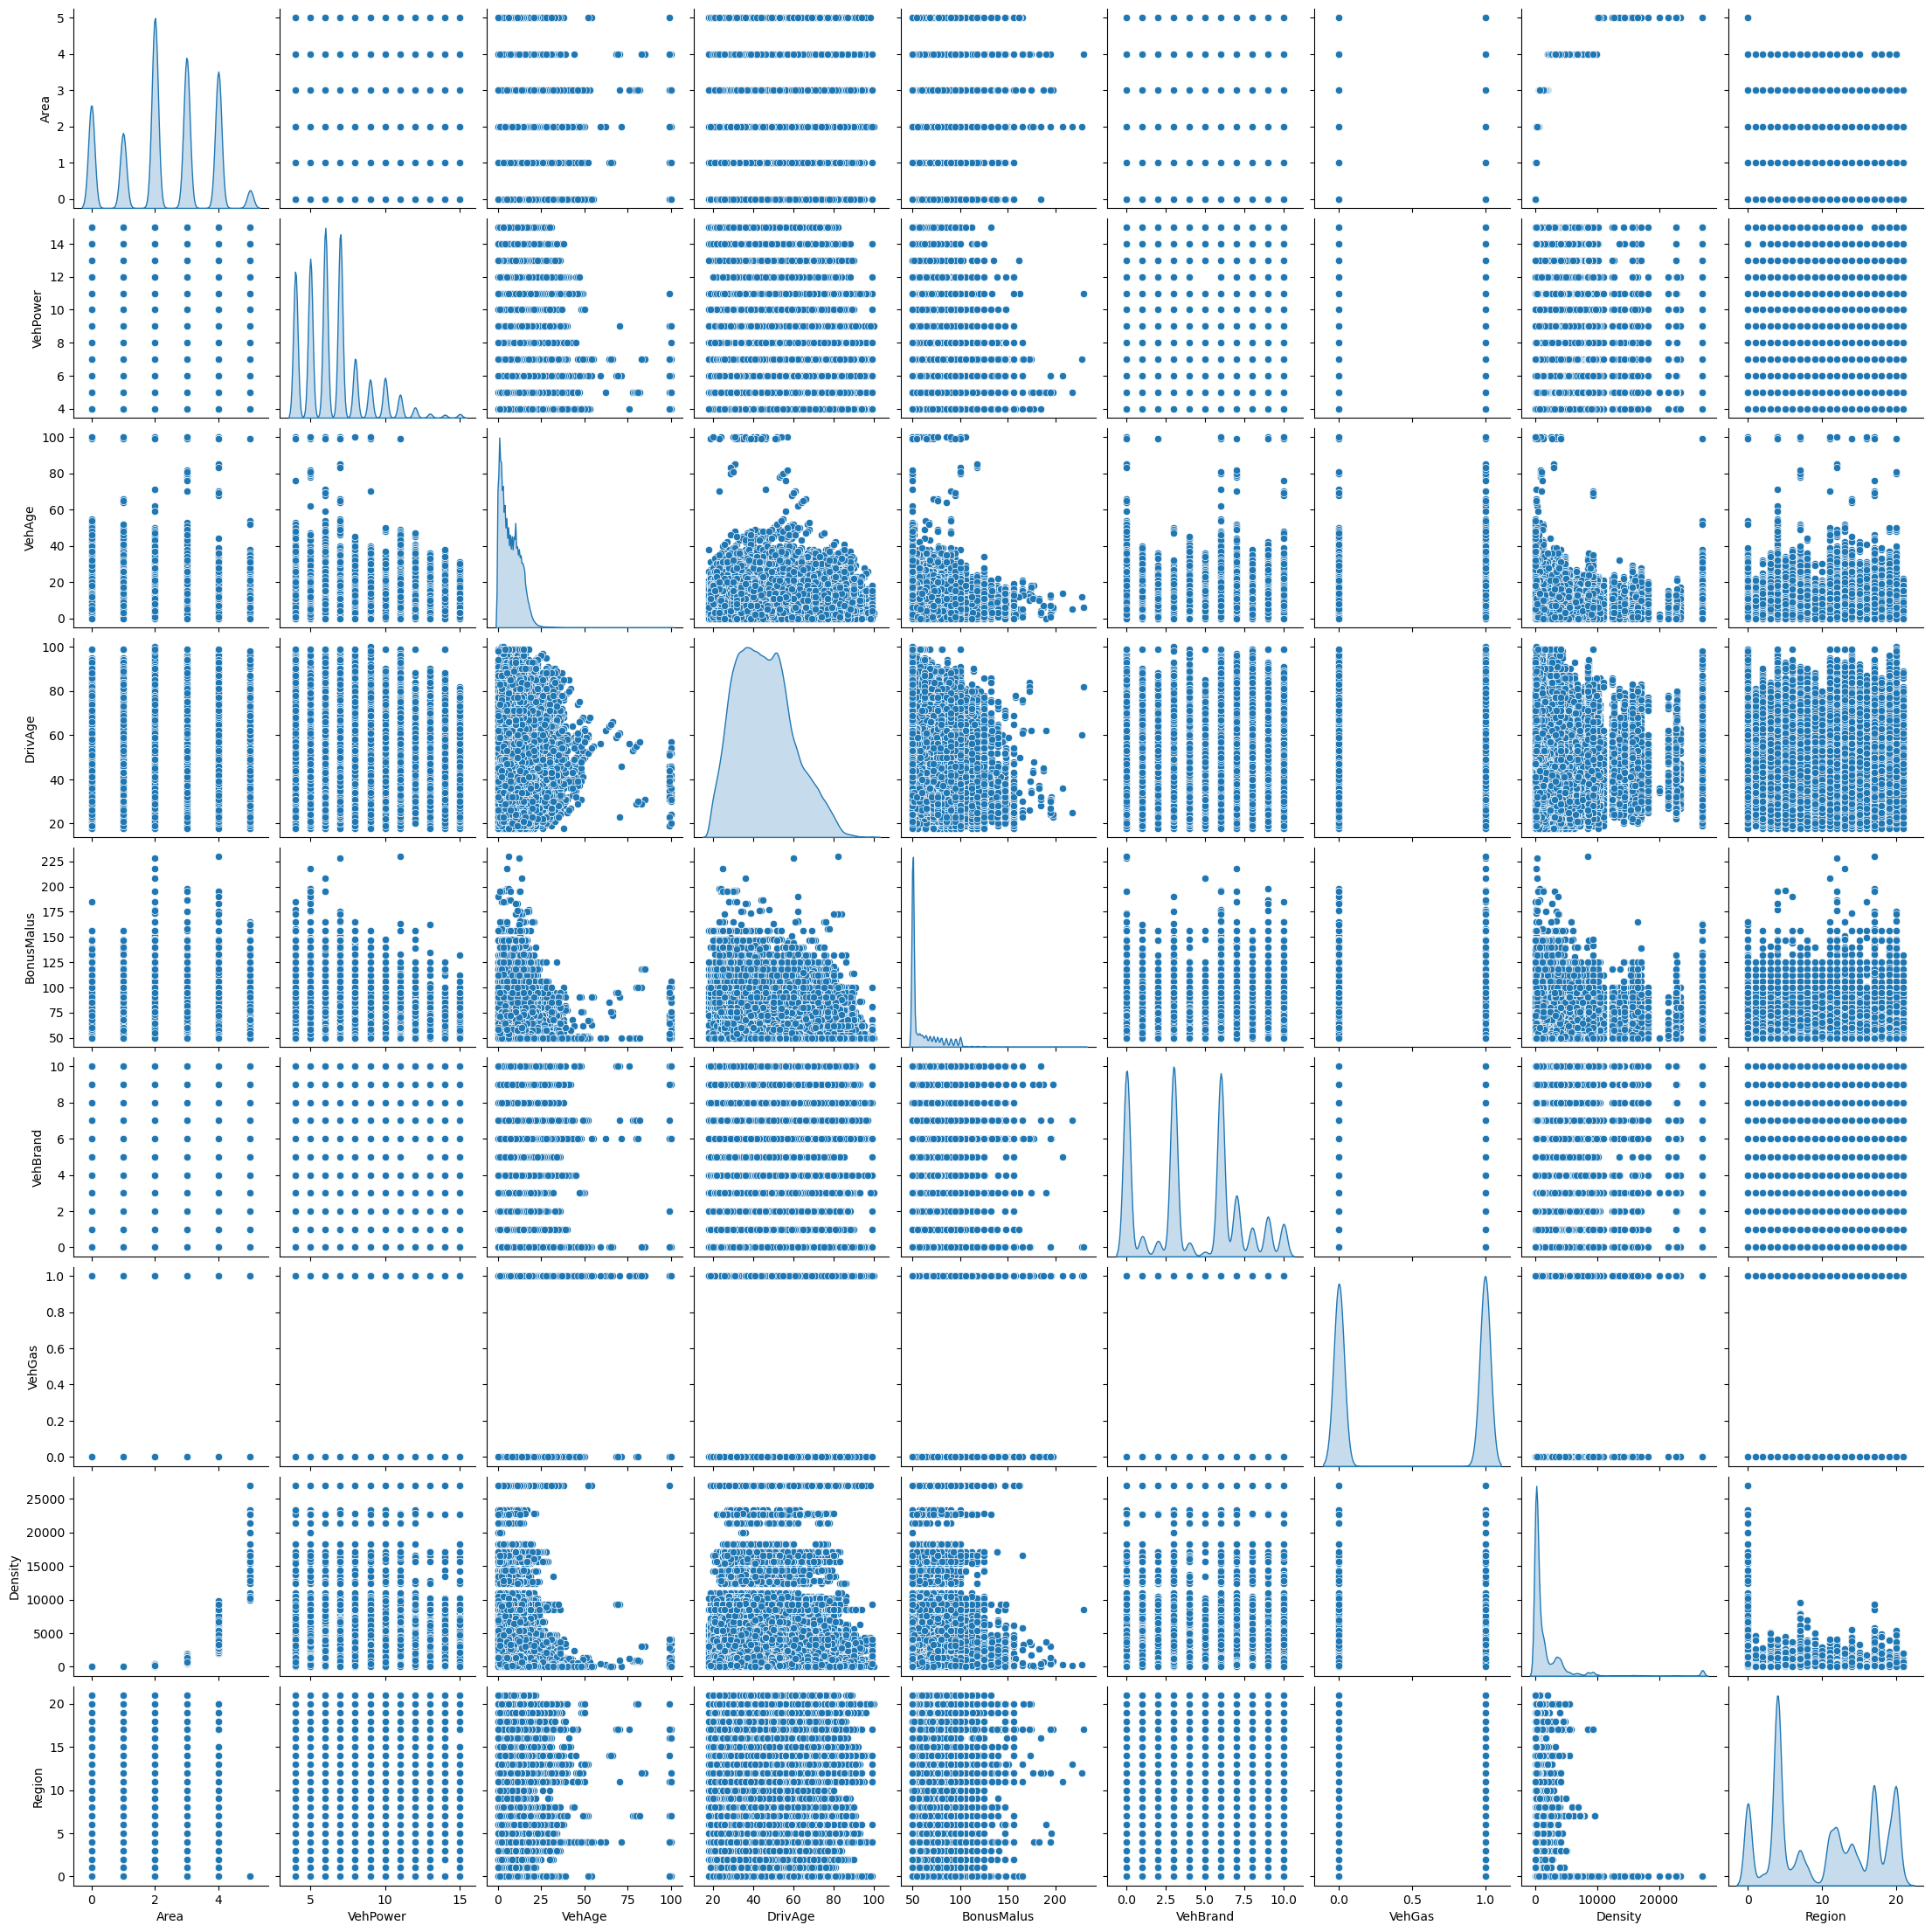

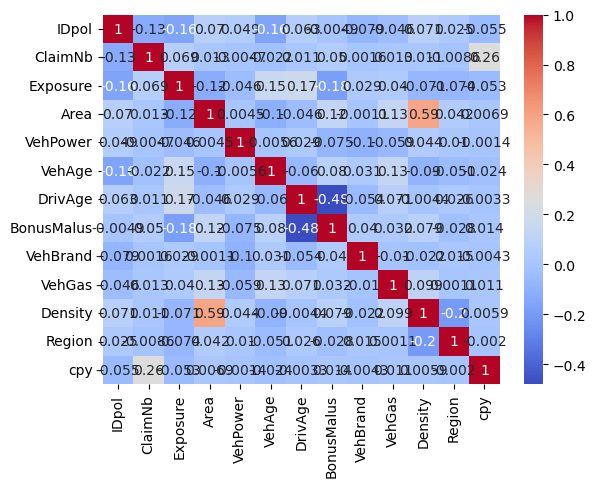

In [6]:
from sklearn.preprocessing import LabelEncoder

df_encoded = train_data.copy()
for col in ['Area', 'VehBrand', 'VehGas', 'Region']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

sns.pairplot(df_encoded[['Area', 'VehPower', 'VehAge', 'DrivAge', 
                         'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region']],
             diag_kind='kde')
plt.show()

corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Since 'Area' and 'Density' are closely related: (from project description): 'Area is an ordinal label starting from “A”, where “A” is most
rural, “B” is less rural, and so on', we compare the boxplots of each 'Area'. 

(We need to have this correlation in mind when explaining the effect of each variable, but we dont need to remove any since PCA or model-based feature selection methods will pick up on this)

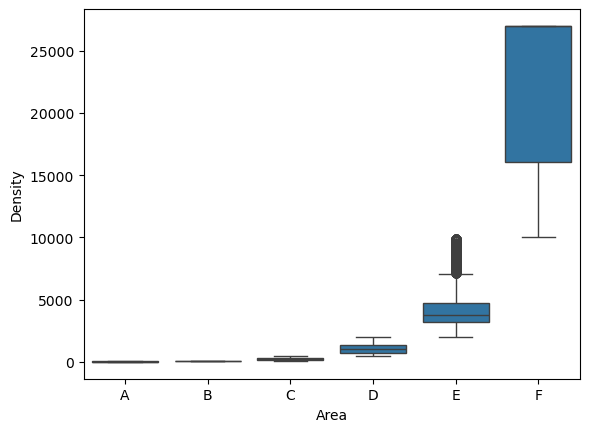

In [19]:
sns.boxplot(
    x='Area', 
    y='Density', 
    data=train_data, 
    order=['A', 'B', 'C', 'D', 'E', 'F']
)
plt.show()

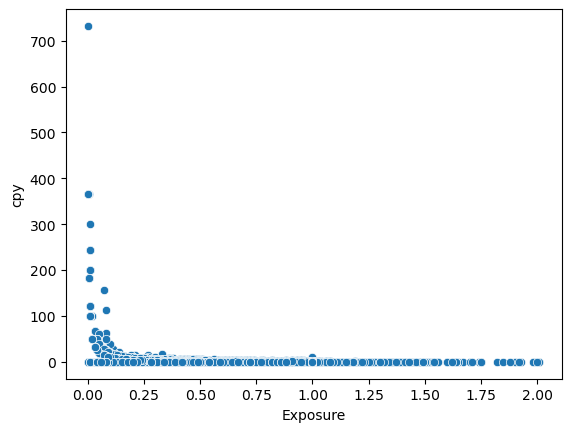

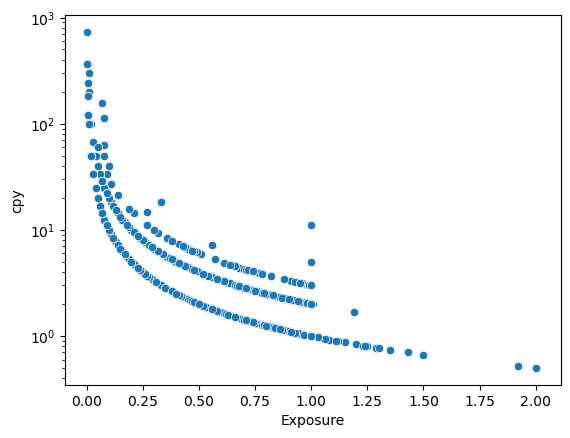

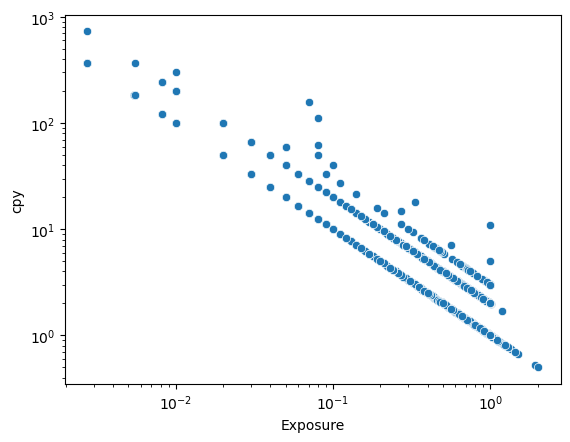

In [18]:
sns.scatterplot(x= 'Exposure', y='cpy', data=train_data)
plt.show()


sns.scatterplot(x='Exposure', y='cpy', data=train_data)
plt.yscale('log')
plt.show()

sns.scatterplot(x='Exposure', y='cpy', data=train_data)
plt.xscale('log')
plt.yscale('log')
plt.show()